## Probabilistic Generative Models:

to make things simples as possible, we considere the case of two classes($K=2$).

First we introduce the $ sigmoid$ function, such as is lying in ]0, 1[ so it represent the classes's probabilities, and it' giveen by the following formula:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $ \sigma (a)=1/(1+exp(-a))$

we apply the Bayes Formula($p(C_{k}/X)=\dfrac{p(X/C_{k})p(C_{k})}{p(X)})$), and assume that the classes_densities are gaussian so the following result:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$p(C_{1}/X)=\sigma(WX+w_{0})$

where:

$W=\Sigma^{-1}(\mu_{1}-\mu_{2})$   

 $w_{0}=\frac{1}{2}\mu_{1}^{T}\Sigma^{-1}\mu_{1}-\frac{1}{2}\mu_{2}^{T}\Sigma^{-1}\mu_{2}+\ln(C_{1}/C_{2})$



## Maximum likelihood solution:

we assume that the data points $(X_{n}, t_{n})$ are independents $(t_{0}=1$ for the classe $C_{1}$ and $t_{0}=0$ for the classe $C_{2})$, then :

$P(T/\mu_{1}, \mu_{2}, \Sigma)=\prod P(t_{n}/\mu_{1}, \mu_{2}, \Sigma)$

we applyied the $log$ function to obtain the maximum, and we derivative with respect to $\mu_{1}, \mu_{2}$ and $\Sigma$, we obtain:

$~~~~~~~~~~~$$\mu_{1}=\dfrac{1}{N_{1}}\sum_{n\in C_{1}}^{}t_{n}X_{n}$ $~~~~~~~~~$           $; \mu_{1}=\dfrac{1}{N_{2}}\sum_{n\in C_{2}}^{}(1-t_{n})X_{n} $$~~~~~~~~~$           $;  S=\dfrac{N_{1}}{N}S_{1}+\dfrac{N_{2}}{N}S_{2}$

where: 

$N_{1}$ is the elements number where $t_{n}=1$.

$N_{2}$ is the elements number where $t_{n}=0$.

$N=N_{1}+N_{2}$.

$S_{1}=\dfrac{1}{N_{1}}\sum_{n\in C_{1}}^{}(X_{n}-\mu_{1})(X_{n}-\mu_{1})^{T}$

$S_{2}=\dfrac{1}{N_{2}}\sum_{n\in C_{2}}^{}(X_{n}-\mu_{2})(X_{n}-\mu_{2})^{T}$

we put all together in the following code:

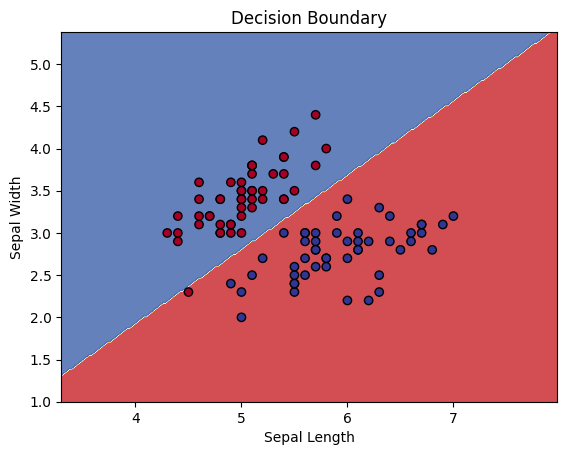

In [17]:
import numpy as np
# numpy for linear algebra 
import matplotlib.pyplot as plt
# matplotlib for data visualization
from numpy.linalg import inv, det
from sklearn.datasets import load_iris
# loading the iris data


class ProbabilisticGenerativeModels:

    def __init__(self, mean1=None, mean2=None, S1=None, S2=None):
        
        if mean1 is None:
           mean1=np.array([.0,.0])
        if mean2 is None:
           mean2=np.array([.0,.0])
        if S1 is None:
           S1=np.array([[1., .0], [1., .0]])
        if S2 is None:
           S2=np.array([[1., .0], [1., .0]])

        self.mean1=mean1
        self.mean2=mean2
        self.S1=S1
        self.S1=S2
        self.p1, self.p2=0.5,0.5

    
    # we need to define probability density function(pdf) of gaussian distribution
    #@staticmethod
    def pdf(self, x, mean, cov):
        # Calculate the exponent
        exponent = -0.5 * np.dot((x - mean).T, np.dot(inv(cov), x - mean))
        # Calculate the PDF
        pdf = (1 / np.sqrt((2 * np.pi)**len(x) * det(cov))) * np.exp(exponent)
        return pdf

    def fit(self, X, y):
        
        # we separete the two classes
        X1=X[y==1]
        X2=X[y==0]
        # we compute the priors
        N1=len(X1)
        N=len(X) 
        # N=N1+N2 such we have two separate classes
        N2=N-N1
        # we compute the means
        self.mean1=np.mean(X1, axis=0)
        self.mean2=np.mean(X2, axis=0)
        # compute the covariance matrix of X1
        self.S1=np.cov(X1.T)
        # compute the covariance matrix of X2
        self.S2=np.cov(X2.T)
        # computing the priors
        self.p1, self.p2=N1/N, N2/N
        self.means=np.stack((self.mean1, self.mean2))
        self.S=np.stack((self.S1, self.S2))
        self.p=np.stack((self.p1, self.p2))
        
    def predict(self, X):

        N=len(X)
        # Initialising the predictions
        predictions=np.zeros(N)
        # iterate over all data
        for i in range(N):
            likelihoods = np.zeros(2)

            for c in [0, 1]:
                likelihoods[c] = self.pdf(X[i], self.means[c], self.S[c])
                
            # applying the Bayes Formula( posterior*evidence=prior*likelihood with evidence=constant)
            posterior_probs = self.p[c] * likelihoods
            #take the  max proba(max posterior )
            predictions[i] = np.argmax(posterior_probs)

        return predictions

# Testing The model
if __name__=='__main__':

    #load and processing the Iris dataset
    iris = load_iris()
    X = iris.data[:, :2]  
    # Consider only the Sepal Length and Sepal Width features
    y = iris.target
    # we remove the third classes such as classifer is a binary classifier
    X = X[y != 2]
    y = y[y != 2]
    # Create an instance of the generative model
    model = ProbabilisticGenerativeModels()
    # train the model
    model.fit(X, y)
    # make predictions
    model.predict(X)
    # visualizing the results 
    h = 0.02  
    # step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Decision Boundary')
    plt.show()
